In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

In [3]:
dataset = pd.read_csv("/home/hpc/iwi5/iwi5305h/data/labels.csv", delimiter=';')
print(list(dataset.columns))

['rep_id', 'export_dir', 'export_file', 't_evnt_start', 't_evnt_end', 'sc_type', 'sc_location', 'phase_select', 'fault_target', 'fault_resistance', 'line_1_2_a_length', 'line_1_2_a_xline', 'line_1_2_a_rline', 'line_1_2_a_cline', 'line_1_2_a_xline0', 'line_1_2_a_rline0', 'line_1_2_a_cline0', 'line_1_2_b_length', 'line_1_2_b_xline', 'line_1_2_b_rline', 'line_1_2_b_cline', 'line_1_2_b_xline0', 'line_1_2_b_rline0', 'line_1_2_b_cline0', 'line_2_3_a_length', 'line_2_3_a_xline', 'line_2_3_a_rline', 'line_2_3_a_cline', 'line_2_3_a_xline0', 'line_2_3_a_rline0', 'line_2_3_a_cline0', 'line_2_3_b_length', 'line_2_3_b_xline', 'line_2_3_b_rline', 'line_2_3_b_cline', 'line_2_3_b_xline0', 'line_2_3_b_rline0', 'line_2_3_b_cline0', 'line_2_3_b_on', 'line_1_2_b_on', 'ext_grid_3_on', 'ext_grid_1_u_setp', 'ext_grid_1_phi_setp', 'ext_grid_1_short_circuit_power', 'ext_grid_3_pgini', 'ext_grid_3_qgini', 'ext_grid_3_short_circuit_power', 'load_3_plini', 'load_3_qlini', 'load_2_plini', 'load_2_qlini']


In [4]:
dataset.head(20)

rep_id                                         export_dir  \
0        0  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
1        1  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
2        2  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
3        3  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
4        4  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
5        5  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
6        6  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
7        7  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
8        8  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
9        9  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
10      10  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
11      11  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
12      12  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
13      13  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
14      14  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
15      15  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
16      16  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
17      17  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
18      18  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   
19      19  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...   

                                          export_file  t_evnt_start  \
0   C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.258363   
1   C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.467834   
2   C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.291311   
3   C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.464287   
4   C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.378896   
5   C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.473582   
6   C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.332861   
7   C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.228512   
8   C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.293126   
9   C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.421237   
10  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.464947   
11  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.338097   
12  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.431566   
13  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.215558   
14  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.408738   
15  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.299919   
16  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.416561   
17  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.449370   
18  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.296483   
19  C:\Users\ud75imaj\Desktop\neuro_prot\results/d...      0.493025   

    t_evnt_end  sc_type  sc_location  phase_select fault_target  \
0     0.290138        0    99.947641             0   Line_2_3_b   
1     0.698350        1    30.387339             1   Line_2_3_a   
2     0.506453        3    61.346316             0   Line_1_2_b   
3     0.535108        2    77.957304             2   Line_2_3_a   
4     0.401967        3    75.289373             1   Line_1_2_b   
5     0.734608        1    29.972734             0   Line_2_3_a   
6     0.674382        1    99.510919             0   Line_2_3_a   
7     0.634591        3    62.272269             0   Line_1_2_b   
8     0.635265        1     4.493926             1   Line_1_2_a   
9     0.451397        2    26.067077             0   Line_2_3_b   
10    0.638019        0    81.799519             0   Line_2_3_a   
11    0.518985        3    11.307207             1   Line_2_3_a   
12    0.605784        0    44.004969             2   Line_1_2_a   
13    0.764757        0    46.268559             1   Line_2_3_b   
14    0.793819        1    48.223073             1   Line_1_2_a   
15    0.318852        2    69.837059             0   Line_1_2_a   
16    0

In [4]:
len(dataset)

1000

In [4]:
df = pd.read_parquet("/home/vault/iwi5/iwi5305h/new_dataset_90kv/all/replica_0.parquet")

In [5]:
df.columns.tolist()

['Zeitpunkt in s',
 'Sekundärstrom L1 in A',
 'Sekundärstrom L2 in A',
 'Sekundärstrom L3 in A',
 'Sekundärspannung L1 in V',
 'Sekundärspannung L2 in V',
 'Sekundärspannung L3 in V',
 'Sekundärstrom L1 in A.1',
 'Sekundärstrom L2 in A.1',
 'Sekundärstrom L3 in A.1',
 'Sekundärspannung L1 in V.1',
 'Sekundärspannung L2 in V.1',
 'Sekundärspannung L3 in V.1',
 'Sekundärstrom L1 in A.2',
 'Sekundärstrom L2 in A.2',
 'Sekundärstrom L3 in A.2',
 'Sekundärspannung L1 in V.2',
 'Sekundärspannung L2 in V.2',
 'Sekundärspannung L3 in V.2',
 'Sekundärstrom L1 in A.3',
 'Sekundärstrom L2 in A.3',
 'Sekundärstrom L3 in A.3',
 'Sekundärspannung L1 in V.3',
 'Sekundärspannung L2 in V.3',
 'Sekundärspannung L3 in V.3',
 'Sekundärstrom L1 in A.4',
 'Sekundärstrom L2 in A.4',
 'Sekundärstrom L3 in A.4',
 'Sekundärspannung L1 in V.4',
 'Sekundärspannung L2 in V.4',
 'Sekundärspannung L3 in V.4',
 'Sekundärstrom L1 in A.5',
 'Sekundärstrom L2 in A.5',
 'Sekundärstrom L3 in A.5',
 'Sekundärspannung L1 in

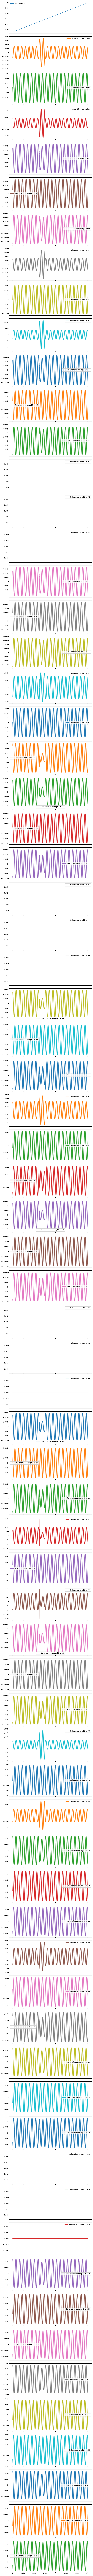

In [11]:
dataset2.plot(
    subplots=True,    # one plot per column
    layout=(len(dataset2.columns), 1),
    figsize=(8, 3*len(dataset2.columns)),
    sharex=True       # if you want the same x-axis across all
)
plt.tight_layout()
plt.show()

In [5]:
from data_processing import StreamingWindowDataset
from config import PROJECT_ROOT, DATA_PATH
from torch.utils.data import DataLoader
from model import VAE, initialize_weights
import torch

In [2]:
dataset = StreamingWindowDataset(
        pattern=f"{DATA_PATH}/replica_*.parquet",
        sample_rate=7200,
        window_ms=100,
        stride_ms=50,
        feature_min=0.0,
        feature_max=1.0
    )
loader = DataLoader(dataset,
                        batch_size=64,
                        shuffle=True,
                        num_workers=4,
                        pin_memory=True)

In [4]:
seq_len = int(7200 * (100 / 1000.0))
_, n_channels = dataset[0].shape
model = VAE(in_channels=n_channels,
            length=seq_len,
            latent_size=16,
            encoder_out_channels=128)

In [6]:
model.load_state_dict(torch.load("/home/hpc/iwi5/iwi5305h/research_project_PR_labs/best_model.pth"))
model.eval()

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.